<a href="https://colab.research.google.com/github/RaminParker/langchain_chrash_course/blob/main/LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LangChain

LangChain ist ein Framework für die Nutzung von LLM's.

- GitHub: https://github.com/hwchase17/langchain
- Docs: https://python.langchain.com/en/latest/index.html

### Überblick:
- Installation
- LLMs
- Prompt Templates
- Chains
- Agents and Tools
- Memory
- Document Loaders
- Indexes

## Installation

In [1]:
!pip install langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. LLMs

Ein Interface für zahlreiche LLM provider. Siehe Liste an LLM providers [hier](https://python.langchain.com/en/latest/modules/models/llms/integrations.html)!

**Zum Beispiel OpenAi:**

In [69]:
# !pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
# # Mount your Google Drive on your Google Colab runtime
# from google.colab import drive
# drive.mount('/content/drive/')

# path_to_key = "/content/drive/MyDrive/Colab Notebooks/configs/openai/token.txt" 
# file1 = open(path_to_key, "r")
# token_oai = file1.read()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [70]:
# import os
# os.environ["OPENAI_API_KEY"] = token_oai

In [71]:
# from langchain.llms import OpenAI

# llm = OpenAI(temperature=0.9)  # default model_name="text-davinci-003"
# text = "What would be a good company name for a company that makes colorful socks?"
# print(llm(text))

RateLimitError: ignored

Zum Beispiel **huggingface**:

In [6]:
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# Mount your Google Drive on your Google Colab runtime
from google.colab import drive
drive.mount('/content/drive/')

path_to_key = "/content/drive/MyDrive/Colab Notebooks/configs/huggingface/token.txt" 
file1 = open(path_to_key, "r")
token_huggingface = file1.read()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [42]:
import os
os.environ["HUGGINGFACEHUB_API_TOKEN"] = token_huggingface

In [43]:
from langchain import HuggingFaceHub

In [72]:
model = "google/flan-t5-xl" # https://huggingface.co/google/flan-t5-xl
# model = "openai-gpt"    
# model = "stabilityai/stablelm-tuned-alpha-3b"          
llm = HuggingFaceHub(repo_id=model, model_kwargs={"temperature":0, "max_length":64})

In [51]:
text = "translate English to German: How old are you?"
llm(text)

'Wie alt sind Sie?'

In [46]:
text = "What would be a good company name for a company that makes colorful socks?"
print(llm(text))

sock monkey


In [54]:
# text = "Who won the FIFA World Cup in the year 1994?"
# print(llm(text))

## 2. Prompt Templates


Anstatt den User-Text direkt in das LLM zu werfen, konstruieren wir ein Promt, um eine bessere Antwort zu erhalten:

In [55]:
llm("Can Barack Obama have a conversation with George Washington?")

'Barack Obama is a current president. George Washington was a past president.'

In [56]:
prompt = """Question: Can Barack Obama have a conversation with George Washington?

Let's think step by step.

Answer: """
llm(prompt)

'George Washington died in 1799. Barack Obama was born in 1961. So the final answer is no.'

In [57]:
from langchain import PromptTemplate

template = """Question: {question}

Let's think step by step.

Answer: """

# Benutzte die Platzhalter als input_variables 
prompt = PromptTemplate(template=template, input_variables=["question"])

Das ist unser finale Promt:

In [58]:
prompt.format(question="Can Barack Obama have a conversation with George Washington?")

"Question: Can Barack Obama have a conversation with George Washington?\n\nLet's think step by step.\n\nAnswer: "

Dieser Prompt kann allerdings nicht direkt dem LLM übergeben werden. Es wir zu einem Fehler kommen:

In [59]:
llm(prompt)

TypeError: ignored

## 3. Chains

Um ein promt template mit einem LLM zu kombinieren benötigen wir ``chains``.

[Hot-To guide about chains](https://python.langchain.com/en/latest/modules/chains/how_to_guides.html)

Es gibt viele Arten von ``chains``. Hier nutzen wir eine ``LLM chain``

In [74]:
from langchain import LLMChain

llm_chain = LLMChain(prompt=prompt, llm=llm)

question = "Can Barack Obama have a conversation with George Washington?"
#question = "In what year was the film Departed with Leopnardo Dicaprio released?"

print(llm_chain.run(question))

The Departed was released in 2003. Leopnardo Dicaprio was in the film Departed in 2003. The final answer: 2003.


## 4. Agents and Tools

Agents beinhalten ein LLM, das Entscheidungen darüber trifft, welche Aktionen ausgeführt werden sollen, diese Aktion ausführt, eine Beobachtung macht und dies wiederholt, bis es abgeschlossen ist.

Wenn sie richtig eingesetzt werden, können Agents extrem leistungsfähig sein. Um Agents zu laden, sollten folgenden Konzepte verstanden sein:

- ``Tool``: Eine Funktion, die eine bestimmte Aufgabe ausführt. Dies können Dinge wie Google-Suche, Datenbankabfrage, Python REPL oder andere chains sein. siehe [Link](https://python.langchain.com/en/latest/modules/agents/tools.html).
- ``LLM``: Das Sprachmodell, das den Agenten antreibt.
- ``Agent``: Der zu verwendende Agent. Siehe [Link](https://python.langchain.com/en/latest/modules/agents/agents/agent_types.html)

In [62]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent

In [63]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=18977e21d8462fc3c75dce4f14d28cf5f767a561738821d5ecca13737b38efcd
  Stored in directory: /root/.cache/pip/wheels/c2/46/f4/caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built wikipedia


Agents uns Tools funktionieren eigentlich am besten mit dem OpenAI Models!

In [64]:
# from langchain.llms import OpenAI
# llm = OpenAI(temperature=0)
tools = load_tools(["wikipedia", "llm-math"], llm=llm)

In [65]:
agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)

In [67]:
agent.run("In what year was the film Departed with Leopnardo Dicaprio released? What is this year raised to the 0.43 power?")



> Entering new AgentExecutor chain...


OutputParserException: ignored

Wir würde ungefähr diese Antwort erwarten:

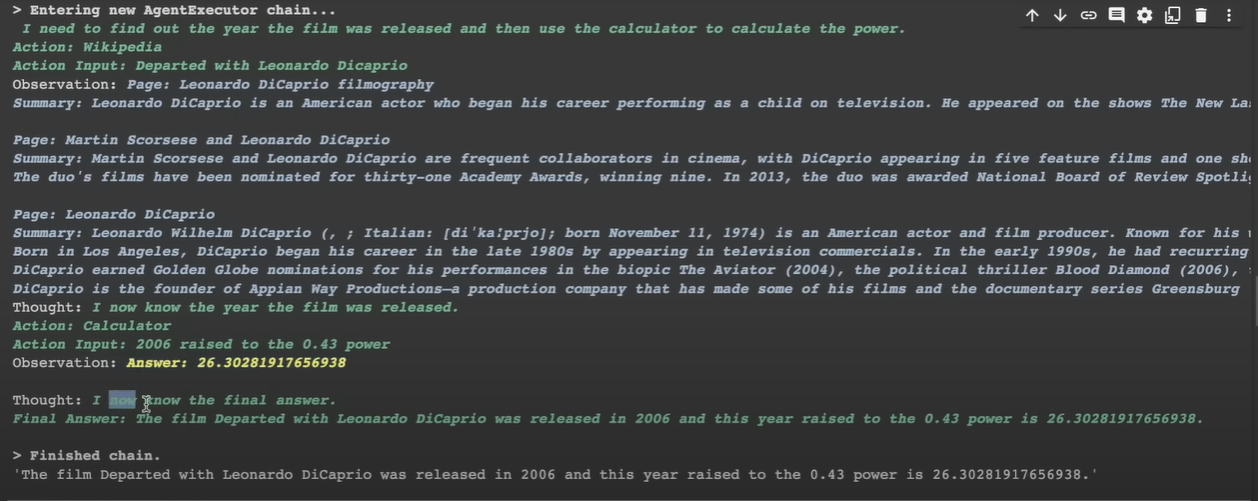

## 5. Memory

Add State to Chains and Agents.

Standardmäßig sind Chains und Agents stateless, was bedeutet, dass sie jede eingehende Anfrage unabhängig behandeln (genauso wie die zugrunde liegenden LLMs und Chat-Modelle). In einigen Anwendungen (z.B. Chatbots) ist es jedoch äußerst wichtig, sich an vorherige Interaktionen zu erinnern, sowohl auf kurzfristiger als auch auf langfristiger Ebene. Dafür gibt es ``Memory``.

Siehe [Link](https://python.langchain.com/en/latest/modules/memory.html)

In [75]:
from langchain import OpenAI
from langchain import ConversationChain

#llm = OpenAI(temperature=0)
conversation = ConversationChain(llm=llm, verbose=True)  # Output anschauen mit 'verbose'

conversation.predict(input="Hi there!")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi there!
AI:

> Finished chain.


'Hi there!'

In [76]:
conversation.predict(input="Can we talk about AI?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI: Hi there!
Human: Can we talk about AI?
AI:

> Finished chain.


'Yes, I can.'

In [77]:
conversation.predict(input="I'm interested in Reinforcement Learning.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI: Hi there!
Human: Can we talk about AI?
AI: Yes, I can.
Human: I'm interested in Reinforcement Learning.
AI:

> Finished chain.


"I'm interested in Reinforcement Learning too."

In [78]:
conversation.predict(input="What is your Name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI: Hi there!
Human: Can we talk about AI?
AI: Yes, I can.
Human: I'm interested in Reinforcement Learning.
AI: I'm interested in Reinforcement Learning too.
Human: What is your Name?
AI:

> Finished chain.


"I don't know."

In [79]:
conversation.predict(input="You are funny!")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI: Hi there!
Human: Can we talk about AI?
AI: Yes, I can.
Human: I'm interested in Reinforcement Learning.
AI: I'm interested in Reinforcement Learning too.
Human: What is your Name?
AI: I don't know.
Human: You are funny!
AI:

> Finished chain.


'I am not funny.'

## 6. Document Loaders

Combining language models with your own text data is a powerful way to differentiate them. The first step in doing this is to load the data into “documents” - a fancy way of say some pieces of text. This module is aimed at making this easy.

https://python.langchain.com/en/latest/modules/indexes/document_loaders.html

In [ ]:
from langchain.document_loaders import NotionDirectoryLoader

loader = NotionDirectoryLoader("Notion_DB")

docs = loader.load()

## 7. Indexes

Indexes refer to ways to structure documents so that LLMs can best interact with them. This module contains utility functions for working with documents

- Embeddings: An embedding is a numerical representation of a piece of information, for example, text, documents, images, audio, etc.
- Text Splitters: When you want to deal with long pieces of text, it is necessary to split up that text into chunks.
- Vectorstores: Vector databases store and index vector embeddings from NLP models to understand the meaning and context of strings of text, sentences, and whole documents for more accurate and relevant search results.

In [ ]:
import requests

url = "https://raw.githubusercontent.com/hwchase17/langchain/master/docs/modules/state_of_the_union.txt"
res = requests.get(url)
with open("state_of_the_union.txt", "w") as f:
  f.write(res.text)

In [ ]:
# Document Loader
from langchain.document_loaders import TextLoader
loader = TextLoader('./state_of_the_union.txt')
documents = loader.load()

In [ ]:
# Text Splitter
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(documents)

In [ ]:
!pip install sentence_transformers

In [ ]:
# Embeddings
from langchain.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings()

#text = "This is a test document."
#query_result = embeddings.embed_query(text)
#doc_result = embeddings.embed_documents([text])

In [ ]:
!pip install faiss-cpu

In [ ]:
# Vectorstore: https://python.langchain.com/en/latest/modules/indexes/vectorstores.html
from langchain.vectorstores import FAISS

db = FAISS.from_documents(docs, embeddings)

query = "What did the president say about Ketanji Brown Jackson"
docs = db.similarity_search(query)

In [ ]:
print(docs[0].page_content)

Tonight. I call on the Senate to: Pass the Freedom to Vote Act. Pass the John Lewis Voting Rights Act. And while you’re at it, pass the Disclose Act so Americans can know who is funding our elections. 

Tonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service. 

One of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. 

And I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.


In [ ]:
db.save_local("faiss_index")
new_db = FAISS.load_local("faiss_index", embeddings)
docs = new_db.similarity_search(query)
print(docs[0].page_content)

## End-to-end example

https://github.com/hwchase17/chat-langchain
